## Insert here your data for testing (CSV format, should be in the same folder of the Notebook):

In [ ]:
test = #filename.csv

## Loading data , run this part

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('creditcard_train.csv')
x=data.drop(['Class'],axis=1)
y=data.Class

X_train1,X_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
X_train1['normalizedAmount'] = StandardScaler().fit_transform(X_train1['Amount'].values.reshape(-1,1))
X_train1 = X_train1.drop(['Amount'],axis=1)
X_train1 = X_train1.drop(['Time'],axis=1)
X_test1['normalizedAmount'] = StandardScaler().fit_transform(X_test1['Amount'].values.reshape(-1,1))
X_test1 = X_test1.drop(['Amount'],axis=1)
X_test1 = X_test1.drop(['Time'],axis=1)

## Part 1: all the dataset , very slow

In [23]:
from sklearn.svm import SVC


clf=SVC(C=1,gamma=0.01, kernel='rbf')
clf.fit(X_train1,y_train1)
y_pred=clf.predict(X_test1)



SVC is a library usefull to support vector machine.It's function of the type of kernel that we are considering, that can be linear,gaussian,sigmoidal, of parameter C usefull to the regularization of the parameters and of parameter gamma that is the kernel coefficient

Accuracy: 0.9994733278158152
Precision: 0.8852459016393442
Recall: 0.7941176470588235
Test Data Accuracy: 0.9995


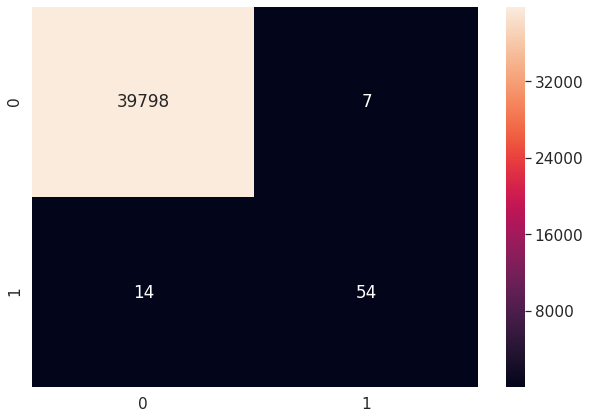

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print('Accuracy:',accuracy_score(y_test1,y_pred))
print('Precision:',metrics.precision_score(y_test1,y_pred))
print('Recall:',metrics.recall_score(y_test1,y_pred))
cm = confusion_matrix(y_test1, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test1, y_pred))

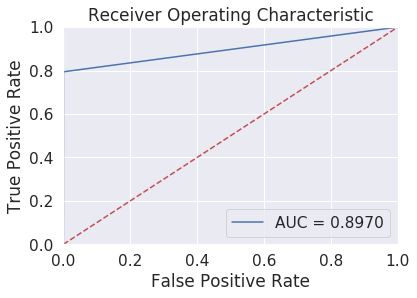

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test1, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Part 2: undersample the dataset

In [26]:
from sklearn.svm import SVC
from sklearn import metrics
train=pd.concat([X_train1,y_train1],axis=1).sample(frac=1)
nofraud_under=train.loc[train.Class==0][:int(np.round((len(train))*0.01))]
fraud = train.loc[train.Class == 1]
train = pd.concat([fraud, nofraud_under]).sample(frac=1)
X_train=train.drop(['Class'],axis=1)
y_train=train.Class
clf=SVC(C=1,gamma=0.01,kernel='rbf')
clf.fit(X_train,y_train)
   
y_pred=clf.predict(X_test1)
                               

Precision: 0.40789473684210525
Recall: 0.9117647058823529
Accuracy: 0.9975923557294409
Test Data Accuracy: 0.9976


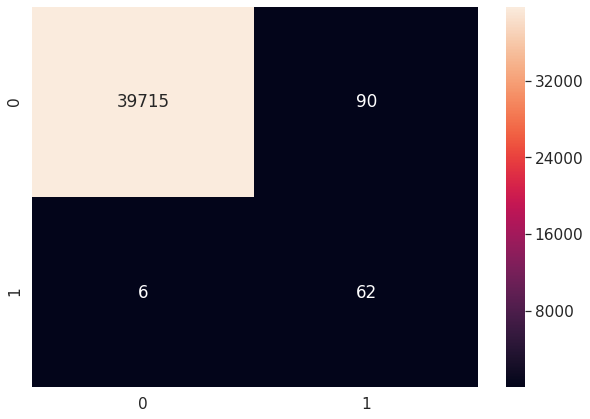

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print('Precision:',metrics.precision_score(y_test1, y_pred))
print('Recall:',metrics.recall_score(y_test1, y_pred))
print('Accuracy:',accuracy_score(y_test1,y_pred))
cm = confusion_matrix(y_test1, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test1, y_pred))

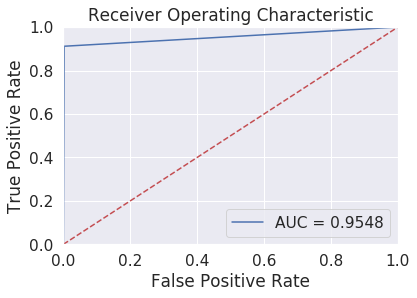

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test1, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


## Part 3: drop irrelevant features

In [29]:
from sklearn.svm import SVC
from sklearn import metrics
train=pd.concat([X_train1,y_train1],axis=1).sample(frac=1)
nofraud_under=train.loc[train.Class==0][:int(np.round((len(train))*0.01))]
fraud = train.loc[train.Class == 1]
train = pd.concat([fraud, nofraud_under]).sample(frac=1)
X_train=train.drop(['Class'],axis=1)
X_train = X_train[['V14', 'V3','V17', 'V12','V10','V11','V4','V1']]
y_train=train.Class

X_test = X_test1[['V14', 'V3','V17', 'V12','V10','V11','V4','V1']]
clf=SVC(C=1,gamma=0.01, kernel='rbf')
clf.fit(X_train,y_train)
   
y_pred=clf.predict(X_test)
                           

Precision: 0.7380952380952381
Recall: 0.9117647058823529
Accuracy: 0.9992977704210869
Test Data Accuracy: 0.9993


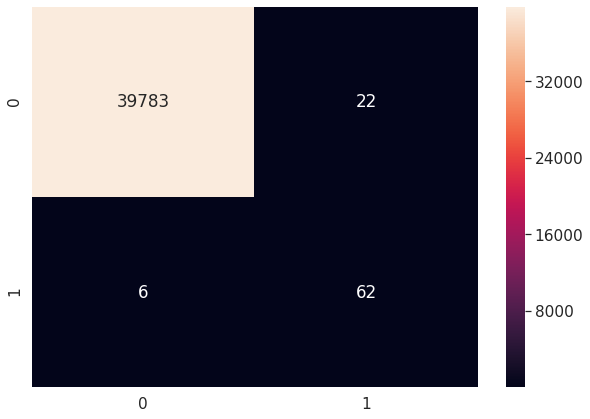

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print('Precision:',metrics.precision_score(y_test1, y_pred))
print('Recall:',metrics.recall_score(y_test1, y_pred))
print('Accuracy:',accuracy_score(y_test1,y_pred))
cm = confusion_matrix(y_test1, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test1, y_pred))


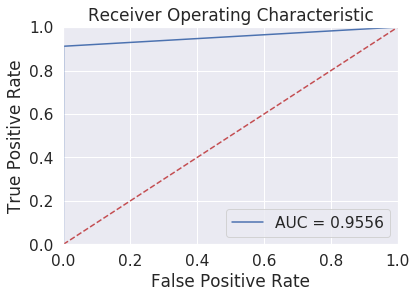

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test1, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();



Cross validation, run it

In [32]:
from sklearn.svm import SVC

train=pd.concat([X_train1,y_train1],axis=1).sample(frac=1)
C_best=0
gamma_best=0.0
recall_best=0.0
data_split=np.array_split(train,4) 
for k in range(3):
    for c in [1,10,25,50]: 
        for gamma in[0.01,0.001]:
            train=data_split.copy() 
            test_train = data_split[k]
            del train[k]
            train=pd.concat(train,sort=False)       
            
            nofraud_under=train.loc[train.Class==0][:int(np.round((len(train))*0.01))]
            fraud = train.loc[train.Class == 1]
            train = pd.concat([fraud, nofraud_under]).sample(frac=1)

            X_train=train.drop(['Class'],axis=1)
            X_train = X_train[['V14', 'V3','V17', 'V12','V10','V11','V4','V1']]
            y_train=train.Class

            X_test=test_train.drop(['Class'],axis=1)
            X_test = X_test[['V14', 'V3','V17', 'V12','V10','V11','V4','V1']]
            y_test=test_train.Class

            result=SVC(C=c,gamma=gamma, kernel='rbf')
            result.fit(X_train,y_train)
            
            y_pred=result.predict(X_test)
            recall=metrics.recall_score(y_test, y_pred)
            if recall>=recall_best:
                C_best=c
                gamma_best=gamma
print('C_best:',C_best)
print('gamma_best:',gamma)

C_best: 50
gamma_best: 0.001


We have used np.array_split to divide the data_set in four equal parts that we have used to do the cross validation. The function del has the function to eliminate the part of dataset that we want use to test our algorithm so  every k-cycle we can use a different data test and different data training. 

Recall: 0.8970588235294118
Precision: 0.7625
Accuracy: 0.9993479296767236
Test Data Accuracy: 0.9993


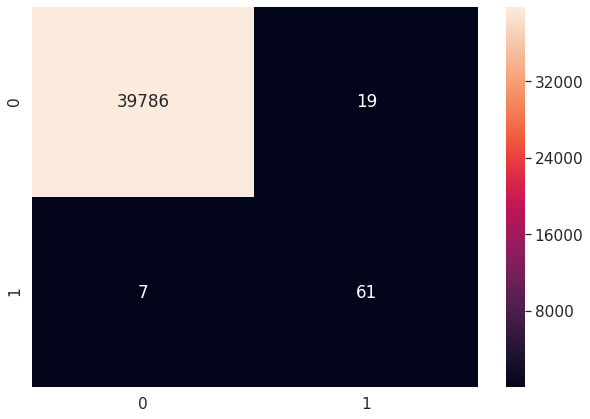

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
train=pd.concat([X_train1,y_train1],axis=1).sample(frac=1)
nofraud_under=train.loc[train.Class==0][:int(np.round((len(train))*0.01))]
fraud = train.loc[train.Class == 1]
train = pd.concat([fraud, nofraud_under]).sample(frac=1)
X_train=train.drop(['Class'],axis=1)
X_train = X_train[['V14', 'V3','V17', 'V12','V10','V11','V4','V1']]
y_train=train.Class
X_test = X_test1[['V14', 'V3','V17', 'V12','V10','V11','V4','V1']]
clf=SVC(C=C_best,gamma=gamma_best, kernel='rbf')
clf.fit(X_train,y_train)
   
y_pred=clf.predict(X_test)
                           

print('Recall:',metrics.recall_score(y_test1, y_pred))
print('Precision:',metrics.precision_score(y_test1, y_pred))
print('Accuracy:',accuracy_score(y_test1,y_pred))
cm = confusion_matrix(y_test1, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test1, y_pred))


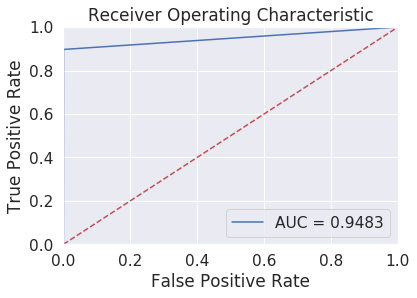

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test1, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Final results

In [ ]:
#Use entire dataset for training
train = data.sample(frac=1)
nofraud_under = train.loc[train.Class == 0][:int(np.round((len(train))*0.01))]
fraud= train.loc[train.Class == 1]
train = pd.concat([fraud, nofraud_under]).sample(frac=1)

X_train = train.drop(['Class','V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Time'], axis = 1)
y_train = train.Class

#Elaborate test data

data_final = pd.read_csv(test)
X_final = data_final.drop(['Class','V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Time'], axis = 1)
y_final = data_final.Class


We have used the C_best e gamma_best in the svc

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
clf=SVC(C=50,gamma=0.001, kernel='rbf')
clf.fit(X_train,y_train)
   
y_pred=clf.predict(X_final)
                           

print('Recall:',metrics.recall_score(y_final, y_pred))
print('Precision:',metrics.precision_score(y_final, y_pred))
print('Accuracy:',accuracy_score(y_final,y_pred))
cm = confusion_matrix(y_final, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_final, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_final, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

np.savetxt('SVM_predictions.txt',y_pred, fmt = '%i', newline = '\n')